<a href="https://colab.research.google.com/github/Mgonzal3z/Whatsapp-Bot-image-analizer/blob/main/WhatsApp_HuggingFace_ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

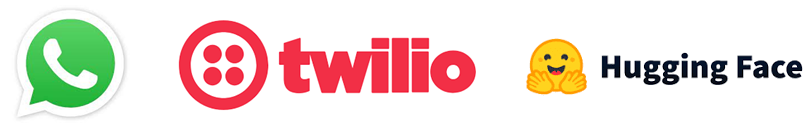

**Step 1. Setup Libraries**

In [ ]:
!killall ngrok

In [ ]:
!pip install transformers

In [ ]:
!pip install twilio requests

In [ ]:
!pip install Flask==3.0.0 pyngrok==7.1.2

In [ ]:
ngrok_key = "2N7Sn84o08UazbVA4jSDT97WpEs_6Ze4BW4U9V42fiCgbxr7W"
#ngrok_key = "YOUR_NGROK_AUTHTOKEN"
port= 5000

In [ ]:
#Requiered for object-detection. It requieres restart runtime.
!pip install timm

In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

**Step 2. Load requierd libraries**

In [ ]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

from skimage import io

**Step 3. Load Vision Transformer**

In [ ]:
from transformers import pipeline

obj_detect = pipeline("object-detection", model="facebook/detr-resnet-50")

**Step 5. Load required libraries**

In [ ]:
import os
import requests
from PIL import Image
from flask import Flask, request
from twilio.twiml.messaging_response import MessagingResponse
import random

DOWNLOAD_DIRECTORY = '/content/TemporaryImages/'

**Step 6. Deploy ngrok server**

In [ ]:
app = Flask(__name__)

@app.route('/bot', methods=['POST'])
def bot():
  resp = MessagingResponse()
  if request.values['NumMedia'] != '0':

    # Use the message SID as a filename.
    filename = request.values['MessageSid']+'.jpg'
    filepath = subdir = os.path.join(DOWNLOAD_DIRECTORY, filename)

    with open(filepath, 'wb') as f:
      image_url = request.values['MediaUrl0']
      f.write(requests.get(image_url).content)

    image = io.imread(filepath)
    plt.imshow(image)
    plt.show()

    results = obj_detect(filepath)
    res_txt = ""

    for result in results:
      res_txt += result['label'] + ":" + str(result['score']) + "\n"

    resp.message(res_txt)

  else:
    resp.message("Hola 👋🏼, envía una imagen para analizarla.")

  return str(resp)

if __name__ == '__main__':
    app.run()